In [1]:
library(cowplot)
library(dplyr)
library(stringr)
library(readr)
library(tidyr)
library(lfe)
library(scales)
library(repr)
library(stargazer)
library(doMC)
registerDoMC(12)


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 


Loading required package: foreach

Loading required package: iterators

Loading 

In [42]:
panel <- readRDS('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/data_v2.RData')
load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/conley_selector_matrix.Rdata')
load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/social_adj_matrix.RData')
load('/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/geo_adjacency_matrix.Rdata')
source('../utils/residualizer+genAlters.R')
source("../utils/labels_and_colors.r")
source('../utils/adjacency_and_cluster_robust_inference.R')
source('../utils/geo_utils.r')

In [43]:
head(panel)

ds,county_fips,sg_nhd,ash_nhd,state_abbv,stay_home,PRCP,TMAX,fb_btvrc,fb_rnstu,⋯,iv368,iv369,iv370,iv371,iv372,iv373,iv374,iv375,iv376,iv377
<date>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-03-01,1001,0.7637755,0.7041312,AL,0,0.00000000,20.26667,0.11245388,0.8800191,⋯,0.005357271,0.006663710,0.003511309,0.004241189,0.004072092,0.002667733,0.007564764,0.0012265722,1.372792e-03,0.0022149108
2020-03-01,1003,0.7363590,0.6821986,AL,0,0.01304348,20.57500,0.10008760,0.8748285,⋯,0.006137997,0.006348736,0.004151409,0.002834256,0.002809559,0.001936217,0.006396609,0.0005820805,8.375583e-04,0.0012945267
2020-03-01,1005,0.7258938,0.6737506,AL,0,0.00000000,17.20000,0.16629393,0.9076493,⋯,0.009109887,0.006426609,0.005651953,0.007230479,0.005569759,0.004599765,0.015908641,0.0039989973,4.200572e-03,0.0081765988
2020-03-01,1007,0.7555653,0.6975934,AL,0,0.00000000,20.60000,0.11779337,0.9035088,⋯,0.004777497,0.005818908,0.004105634,0.003127532,0.002442699,0.001934998,0.006958150,-0.0001016781,5.247706e-05,0.0001270144
2020-03-01,1009,0.7719222,0.7105927,AL,0,0.00000000,18.90000,0.08822023,0.8926064,⋯,0.004944538,0.004278320,0.002546250,0.002235429,0.001753761,0.001393184,0.004096344,-0.0001758338,-2.536857e-05,-0.0002467153
2020-03-01,1011,0.6967632,0.6500129,AL,0,0.00000000,19.13333,0.16487885,0.9151515,⋯,0.005793979,0.005664000,0.003137927,0.003334738,0.003452031,0.002706258,0.007705054,0.0012745797,1.470142e-03,0.0029409972


In [78]:
DV = c('ash_rnstu', 'ash_nhd', 'fb_btvrc', 'log_mcbgv')

### compute f stat on the observed model

In [90]:
formula_1 <- ash_rnstu.r ~ 0 + stay_home.r + alter_sh.r + geo_alter_sh.r + ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r | county_fips + ds | 0 | state_abbv
wald_formula <- ~ alter_sh.r + geo_alter_sh.r

In [91]:
fm <- felm(
        formula_1,
        data = panel,
        weights = panel$n
    )
f_obs1 = lfe::waldtest(fm, wald_formula)['F']
f_obs1

F 
14.58551

In [92]:
formula_2 <- ash_nhd.r ~ 0 + stay_home.r + alter_sh.r + geo_alter_sh.r + ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r | county_fips + ds | 0 | state_abbv

In [93]:
fm <- felm(
        formula_2,
        data = panel,
        weights = panel$n
    )
f_obs2 = lfe::waldtest(fm, wald_formula)['F']
f_obs2

F 
15.37948

In [83]:
formula_3 <- fb_btvrc.r ~ 0 + stay_home.r + alter_sh.r + geo_alter_sh.r + ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r | county_fips + ds | 0 | state_abbv

In [94]:
fm <- felm(
        formula_3,
        data = panel,
        weights = panel$n
    )
f_obs3 = lfe::waldtest(fm, wald_formula)['F']
f_obs3

F 
41.01215

In [85]:
formula_4 <- log_mcbgv.r ~ 0 + stay_home.r + alter_sh.r + geo_alter_sh.r + ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r | county_fips + ds | 0 | state_abbv

In [95]:
fm <- felm(
        formula_4,
        data = panel,
        weights = panel$n
    )
f_obs4 = lfe::waldtest(fm, wald_formula)['F']
f_obs4

F 
14.40295

### compute f stat for placebo draws and show p-value and distribution 

### ash_rnstu

In [60]:
placebo = list.files('/nfs/sloanlab004/projects/covid_mobility_proj/models/did_placebo/')
outcome = 'ash_rnstu'
files = str_subset(placebo,paste0('DiD_geoSocial_',outcome))

In [108]:
head(files)

[1] "DiD_geoSocial_log_mcbgv_0001.RDS" "DiD_geoSocial_log_mcbgv_0002.RDS"
[3] "DiD_geoSocial_log_mcbgv_0003.RDS" "DiD_geoSocial_log_mcbgv_0004.RDS"
[5] "DiD_geoSocial_log_mcbgv_0005.RDS" "DiD_geoSocial_log_mcbgv_0006.RDS"

In [33]:
foreach (i = 1:1000, .combine=c) %dopar% {
    
    fm = readRDS(paste0('/nfs/sloanlab004/projects/covid_mobility_proj/models/did_placebo/',files[i]))
    
    wald_formula <- ~ alter_sh.r + geo_alter_sh.r
    
    unname(lfe::waldtest(fm, wald_formula_1)['F'])
    
    
} -> f1

In [37]:
ggplot(
    aes(x = null_test_statistic),
    data = data.frame(null_test_statistic = f1)
) + geom_histogram() + 
    geom_vline(xintercept = f1_obs, color = "red") +
    theme_bw() +
    xlab("F-statistic") -> test1

[1] 0.448

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



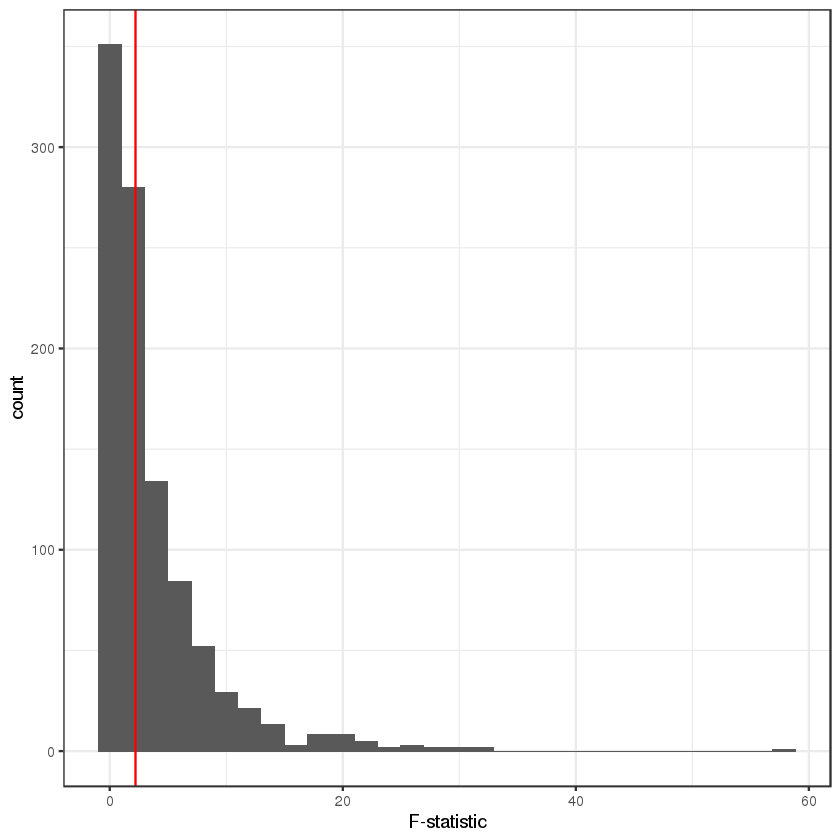

In [39]:
mean(f1 > f_obs1)
test1

### ash_nhd

In [63]:
placebo = list.files('/nfs/sloanlab004/projects/covid_mobility_proj/models/did_placebo/')
outcome = 'ash_nhd'
files = str_subset(placebo,paste0('DiD_geoSocial_',outcome))

In [109]:
head(files)

[1] "DiD_geoSocial_log_mcbgv_0001.RDS" "DiD_geoSocial_log_mcbgv_0002.RDS"
[3] "DiD_geoSocial_log_mcbgv_0003.RDS" "DiD_geoSocial_log_mcbgv_0004.RDS"
[5] "DiD_geoSocial_log_mcbgv_0005.RDS" "DiD_geoSocial_log_mcbgv_0006.RDS"

In [65]:
foreach (i = 1:1000, .combine=c) %dopar% {
    
    fm = readRDS(paste0('/nfs/sloanlab004/projects/covid_mobility_proj/models/did_placebo/',files[i]))
    
    wald_formula <- ~ alter_sh.r + geo_alter_sh.r
    
    unname(lfe::waldtest(fm, wald_formula)['F'])
    
    
} -> f2

In [69]:
ggplot(
    aes(x = null_test_statistic),
    data = data.frame(null_test_statistic = f2)
) + geom_histogram() + 
    geom_vline(xintercept = f_obs2, color = "red") +
    theme_bw() +
    xlab("F-statistic") -> test2

[1] 0.041

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



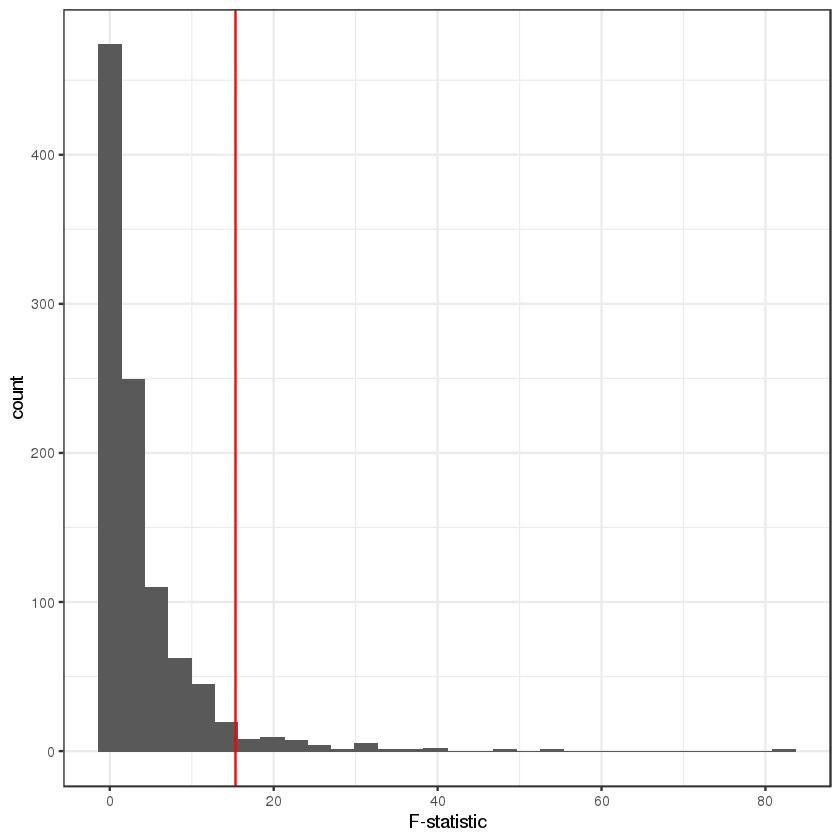

In [70]:
mean(f2 > f_obs2)
test2

### fb_btvrc

In [88]:
placebo = list.files('/nfs/sloanlab004/projects/covid_mobility_proj/models/did_placebo/')
outcome = 'fb_btvrc'
files = str_subset(placebo,paste0('DiD_geoSocial_',outcome))

In [110]:
head(files)

[1] "DiD_geoSocial_log_mcbgv_0001.RDS" "DiD_geoSocial_log_mcbgv_0002.RDS"
[3] "DiD_geoSocial_log_mcbgv_0003.RDS" "DiD_geoSocial_log_mcbgv_0004.RDS"
[5] "DiD_geoSocial_log_mcbgv_0005.RDS" "DiD_geoSocial_log_mcbgv_0006.RDS"

In [96]:
foreach (i = 1:1000, .combine=c) %dopar% {
    
    fm = readRDS(paste0('/nfs/sloanlab004/projects/covid_mobility_proj/models/did_placebo/',files[i]))
    
    #formula_1 <- ash_rnstu.r ~ 0 + stay_home.r + alter_sh.r + geo_alter_sh.r + ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r | county_fips + ds | 0 | state_abbv
    wald_formula <- ~ alter_sh.r + geo_alter_sh.r
    
    unname(lfe::waldtest(fm, wald_formula)['F'])
    
    
} -> f3

In [97]:
ggplot(
    aes(x = null_test_statistic),
    data = data.frame(null_test_statistic = f3)
) + geom_histogram() + 
    geom_vline(xintercept = f_obs3, color = "red") +
    theme_bw() +
    xlab("F-statistic") -> test3

[1] 0.002

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



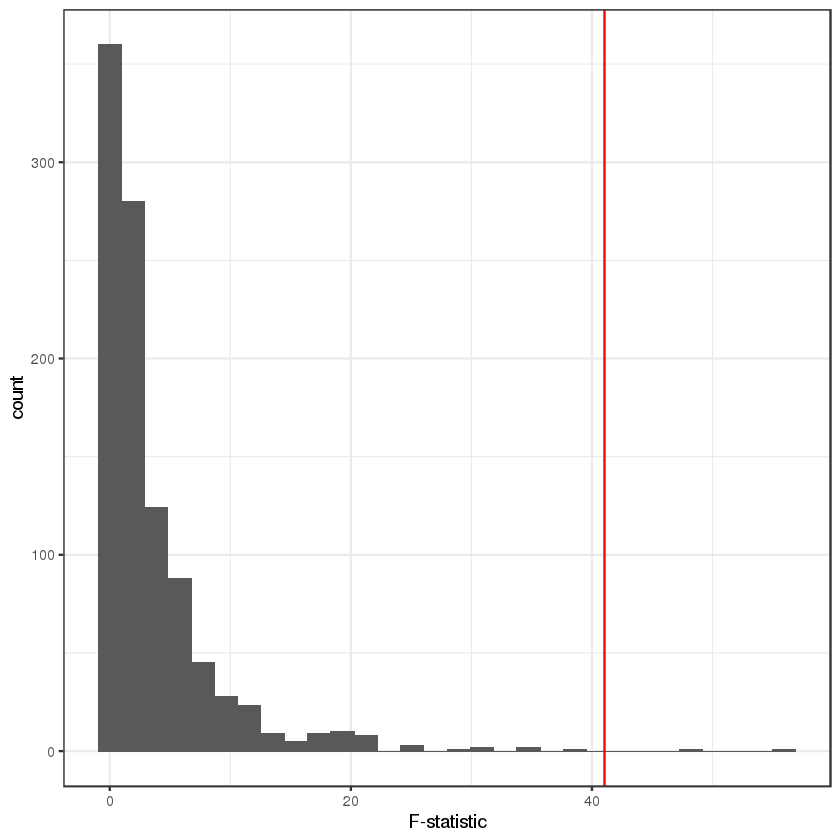

In [98]:
mean(f3 > f_obs3)
test3

### log_mcbgv

In [103]:
placebo = list.files('/nfs/sloanlab004/projects/covid_mobility_proj/models/did_placebo/')
outcome = 'log_mcbgv'
files = str_subset(placebo,paste0('DiD_geoSocial_',outcome))

In [111]:
head(files)

[1] "DiD_geoSocial_log_mcbgv_0001.RDS" "DiD_geoSocial_log_mcbgv_0002.RDS"
[3] "DiD_geoSocial_log_mcbgv_0003.RDS" "DiD_geoSocial_log_mcbgv_0004.RDS"
[5] "DiD_geoSocial_log_mcbgv_0005.RDS" "DiD_geoSocial_log_mcbgv_0006.RDS"

In [105]:
foreach (i = 1:1000, .combine=c) %dopar% {
    
    fm = readRDS(paste0('/nfs/sloanlab004/projects/covid_mobility_proj/models/did_placebo/',files[i]))
    
    #formula_1 <- ash_rnstu.r ~ 0 + stay_home.r + alter_sh.r + geo_alter_sh.r + ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r | county_fips + ds | 0 | state_abbv
    wald_formula <- ~ alter_sh.r + geo_alter_sh.r
    
    unname(lfe::waldtest(fm, wald_formula)['F'])
    
    
} -> f4

In [106]:
ggplot(
    aes(x = null_test_statistic),
    data = data.frame(null_test_statistic = f4)
) + geom_histogram() + 
    geom_vline(xintercept = f_obs4, color = "red") +
    theme_bw() +
    xlab("F-statistic") -> test4

[1] 0.038

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



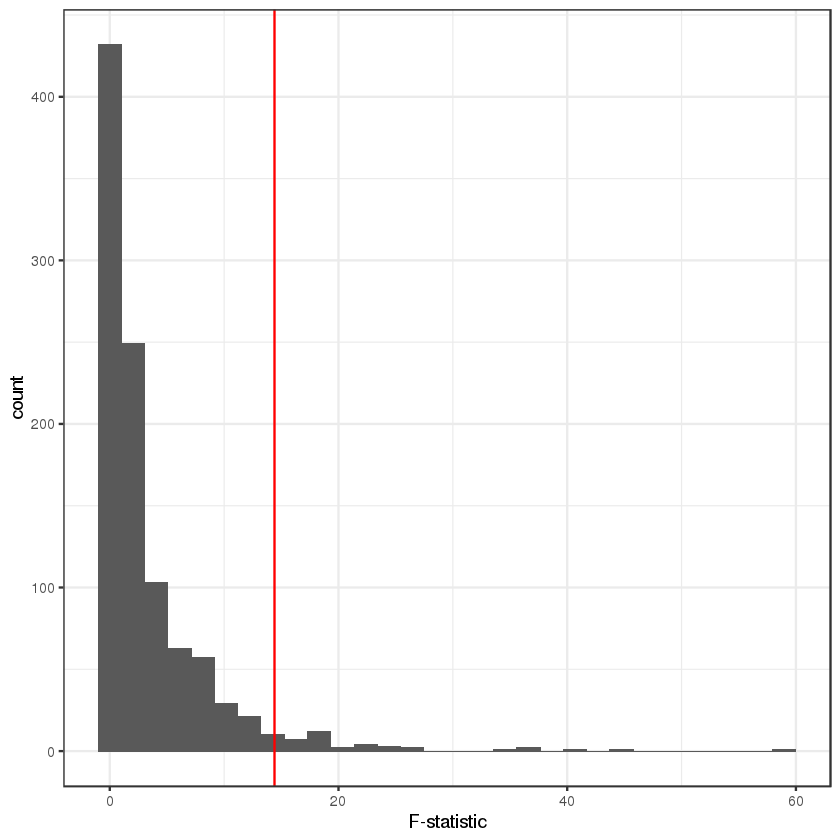

In [107]:
mean(f4 > f_obs4)
test4

In [71]:
DV

[1] "ash_rnstu" "ash_nhd"   "fb_btvrc"  "log_mcbgv"

doFRI <- function(outcome) {
    
    # compute the observed f stat
    
    formula <- paste0(outcome,
                      '.r',
                      '~ 0 + stay_home.r + alter_sh.r + geo_alter_sh.r + ban_gmr.r + alter_bgmr.r + geo_alter_bgmr.r | county_fips + ds | 0 | state_abbv')
    wald_formula <- ~ alter_sh.r + geo_alter_sh.r
    
    
    fm <- felm(
        formula,
        data = panel,
        weights = panel$n
    )
    
    f_obs = lfe::waldtest(fm, wald_formula)['F']
    
    
    # compute f stat for all placebo draws
    
    placebo = list.files('/nfs/sloanlab004/projects/covid_mobility_proj/models/did_placebo/')
    files = str_subset(placebo,paste0('DiD_geoSocial_',outcome))
    
    foreach (i = 1:1000, .combine=c) %dopar% {
    
    fm = readRDS(paste0('/nfs/sloanlab004/projects/covid_mobility_proj/models/did_placebo/',files[i]))
    
    unname(lfe::waldtest(fm, wald_formula)['F'])
    
    
} -> f
    
    list(f_obs,f)
}